# Lecture 1: Introduction to Data Science in Python
### [Areeb Gani](https://github.com/Qwerty71), [Michael Ilie](https://www.mci.sh), [Vijay Shanmugam](https://www.vijayrs.ml)
This notebook helps introduce some of the most basic tools that are commonly used for doing data science and statistics in Python.

## Note: you will need to run the following code cell every time you restart this notebook
If this is your first time using Jupyter, click the block of code below and either press the Run button or press `Shift + Enter` on your keyboard.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from   sklearn.linear_model import LinearRegression

from IPython.display import display

iris = sns.load_dataset('iris')

# Jupyter Notebook <a id="Jupyter-Notebook"></a>
[Jupyter Notebook](https://jupyter.org/) is an interactive tool for running code and visualizing data. Each notebook consists of a series of _code cells_ and _Markdown cells_.

* Code cells allow you to run code in a number of languages. Behind the scenes, Jupyter runs a "kernel" that processes the code whenever you execute a cell. Since this is a Python notebook, Jupyter is running the [IPython](https://ipython.org/) kernel. However, kernels also exist for Julia, R, and many other languages.
* Markdown cells display text using the [Markdown language](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html). In addition to displaying text, you can write equations in these cells using $\LaTeX$.

To run code, click a code cell (like the one below) and do one of the following:
* Press `Shift + Enter` on your keyboard
* On the toolbar at the top of this notebook, press the <i class="fa-step-forward fa"></i><span class="toolbar-btn-label">Run</span> button.

In [2]:
print("Hello, world!")

Hello, world!


You can render a markdown cell in the same way. Double click the text below, and try putting in some of the following items:

    # This is a large heading!
    ## This is a smaller heading!
    ### This is an even smaller heading!
    Here is some code: `x = y + z`
    And here is an equation: $x = y + z$


## *Double-click this text!*


### Cell magic
The IPython kernel provides some useful tools for programmers, including

* [Magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html), which allow you to do things like look up documentation and past commands that you've run, and
* [Building graphical user interfaces (GUIs)](https://ipython.org/ipython-doc/stable/interactive/reference.html#gui-event-loop-support) to make it easier to interact with your code.

Here's an example of a useful magic command. `?` will look up the documentation for a library, class, or function to help you figure out how to use it. For instance, if I want to learn about [pandas DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), I can run the following:

In [3]:
?pd.DataFrame

If you want to see all the magic functions that IPython makes available to you, `%quickref` can give you a high-level overview.

In [4]:
%quickref

### Widgets
IPython and Jupyter Notebook also makes it easy to build [widgets](https://ipywidgets.readthedocs.io/en/latest/index.html), which give you a richer interface with which to interact with the notebook. Try running the code cell below. This code creates two plots, and displays them in adjacent tabs.

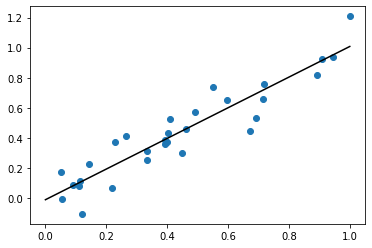

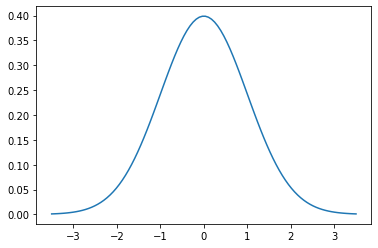

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.stats import norm, linregress

out = [widgets.Output(), widgets.Output()]
tabs = widgets.Tab(children=[out[0], out[1]])
tabs.set_title(0, 'Linear regression')
tabs.set_title(1, 'Normal distribution')

with out[0]:
    # Fit line to some random data
    x = np.random.uniform(size=30)
    y = x + np.random.normal(scale=0.1, size=30)
    slope, intercept, _, _, _ = linregress(x,y)
    u = np.linspace(0, 1)
    
    # Plot
    fig1, axes1 = plt.subplots()
    axes1.scatter(x, y)
    axes1.plot(u, slope * u + intercept, 'k')
    plt.show(fig1)

with out[1]:
    # Plot the probability distribution function (pdf) of the
    # standard normal distribution.
    x = np.linspace(-3.5, 3.5, num=100)
    p = norm.pdf(x)
    
    # Plot
    fig2, axes2 = plt.subplots()
    axes2.plot(x, p)
    plt.show(fig2)

display(tabs)

You can create much richer and more complex interfaces that include buttons, sliders, progress bars, and more with Jupyter's ipywidgets library ([docs](https://ipywidgets.readthedocs.io/en/latest/index.html)).

# pandas <a id="pandas"></a>
[pandas](https://pandas.pydata.org/) is a Python library that provides useful data structures and tools for analyzing data.

The fundamental type of the pandas library is the `DataFrame`. In the following code, we load the [iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) using the [seaborn library](https://seaborn.pydata.org/). By default, this dataset is stored in a pandas `DataFrame`.

In [6]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset('iris')

# `iris` is stored as a pandas DataFrame
print('Type of "iris":', type(iris))

# Show the first few entries in this DataFrame
iris.head()

Type of "iris": <class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's get some information about the iris dataset. Let's try to do the following:

1. Find out how many columns there are in the `DataFrame` object, and what kinds of data are in each column
2. Calculate the average petal length
3. Determine what species of flowers are in the dataset
4. Get an overall summary of the dataset

In [7]:
# 1. Column labels, and types of data in each column
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
# 2. Calculate the average petal length
iris['petal_length'].mean()

3.7580000000000005

In [9]:
# 3. Determine which iris species are in the dataset
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
# 4. Summary of the data
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Sometimes we need to extract certain rows or columns of a DataFrame. For instance, in the following code we store each species of flower in its own variable:

In [11]:
"""
IPython.display is a convenience function that works in Jupyter Notebook
(or, more generally, any IPython-based application) that will show
objects in a nicer way than using print(). We'll use it in this notebook
to show some pandas DataFrames.
"""
from IPython.display import display

"""
Create a DataFrame for each species of flower. I've provided two
methods for creating these DataFrames below; pick whichever you
prefer as they are equivalent.
"""
# Method 1: "query" function
setosa = iris.query('species == "setosa"')
versicolor = iris.query('species == "versicolor"')

# Method 2: index into the DataFrame
virginica = iris[iris['species'] == 'virginica']

"""
Show the first few entries of the DataFrame corresponding to each species
"""
print('Setosa data:')
display(setosa.head())

print('Versicolor data:')
display(versicolor.head())

print('Virginica data:')
display(virginica.head())

Setosa data:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Versicolor data:


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


Virginica data:


,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


To extract a column, we can either use `iris[column_name]` or `iris.iloc[:,column_index]`.

In [12]:
"""
Get the first column.

Note: whenever we extract a single column of a pandas DataFrame,
we get back a pandas Series object. To turn it back into a DataFrame,
we add the line `first_column = pd.DataFrame(first_column)`.
"""
first_column = iris.iloc[:,0]
first_column = pd.DataFrame(first_column)

print('First column:')
display(first_column.head())

"""
Get the first through third columns
"""
first_through_third_columns = iris.iloc[:,0:3]

print('First through third columns:')
display(first_through_third_columns.head())

"""
Get the 'species' column.
"""
species = iris['species']
species = pd.DataFrame(species)

print('Species column:')
display(species.head())

"""
Get all columns *except* the species column
"""
all_but_species = iris.iloc[:, iris.columns != 'species']

print("All columns *except* species:")
display(all_but_species.head())

First column:


,sepal_length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0


First through third columns:


,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


Species column:


,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


All columns *except* species:


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


If you want to create your own pandas `DataFrame`, you have to specify the names of the columns and the items in the rows of the `DataFrame`.

In [13]:
column_labels = ['A', 'B']

column_entries = [
    [1, 2],
    [4, 5],
    [7, 8]
]

pd.DataFrame(column_entries, columns=column_labels)

,A,B
0,1,2
1,4,5
2,7,8


## Introduction to NumPy
[NumPy](https://www.numpy.org/) is another Python package providing useful data structures and mathematical functions. NumPy's fundamental data type is the array, `numpy.ndarray`, which is like a stripped-down version of a pandas `DataFrame`. However, the `numpy.ndarray` supports much faster operations, which makes it a lot more practical for scientific computing than, say, Python's list objects.

In [14]:
import numpy as np

# 1. Create an array with the numbers [1, 2, 3]
x = np.array([1, 2, 3])

# 2. Create a 2 x 2 matrix with [1, 2] in the first row and [3, 4]
#    in the second row.
x = np.array( [[1,2], [3,4]] )

# 3. Create an array with the numbers 0, 1, ... , 9. Equivalent to
#    calling np.array(range(10))
x = np.arange(10)

# 4. Create a 2 x 2 matrix with zeros in all entries
x = np.zeros( (2,2) )

# 5. Get the total number of items in the matrix, and the shape of
#    the matrix.
num_items    = x.size
matrix_shape = x.shape

Besides just providing data structures, though, NumPy provides many mathematical utilities as well.

In [15]:
### Constants: pi
print('π      = %f' % np.pi)
print()

### Simple functions: sine, cosine, e^x, log, ...
print('sin(0) = %f' % np.sin(0))
print('cos(0) = %f' % np.cos(0))
print('e^1    = %f' % np.exp(1))
print('ln(1)  = %f' % np.log(1))
print()

### Minimums, maximums, sums...
x = np.array([1,2,3])
print('Min of [1,2,3] = %d' % x.min())
print('Max of [1,2,3] = %d' % x.max())
print('Sum of [1,2,3] = %d' % x.sum())
print()

### Random numbers: uniform distribution, normal distribution, ...
print('Random numbers:')
print('Uniform([0,1]): %f' % np.random.uniform(0,1))
print('Normal(0,1):    %f' % np.random.normal(loc=0, scale=1))
print('Poisson(1):     %f' % np.random.poisson(1))

π      = 3.141593

sin(0) = 0.000000
cos(0) = 1.000000
e^1    = 2.718282
ln(1)  = 0.000000

Min of [1,2,3] = 1
Max of [1,2,3] = 3
Sum of [1,2,3] = 6

Random numbers:
Uniform([0,1]): 0.399813
Normal(0,1):    -0.635296
Poisson(1):     0.000000


NumPy is primarily used to do large-scale operations on arrays of numbers. Because it has C code running behind the scenes, it can do these computations extremely quickly -- much faster than you could do with regular Python code. Among other things, with NumPy you can

* add a number to every element of an array;
* multiply every element of an array by a number;
* add or multiply two arrays together; or
* calculate a matrix-vector or matrix-matrix product between arrays.

In [16]:
x = np.array([1,2,3])
y = np.array([4,5,6])

print('1 + [1,2,3] =', 1 + x)
print('3 * [1,2,3] =', 3 * x)
print('[1,2,3] * [4,5,6] =', x * y)
print('[1,2,3] + [4,5,6] =', x + y)
print('Dot product of [1,2,3] and [4,5,6] =', x.dot(y))

1 + [1,2,3] = [2 3 4]
3 * [1,2,3] = [3 6 9]
[1,2,3] * [4,5,6] = [ 4 10 18]
[1,2,3] + [4,5,6] = [5 7 9]
Dot product of [1,2,3] and [4,5,6] = 32


# Linear regression with scikit-learn and statsmodels
In the last section of the notebook, we're going to use linear regression to try and predict the petal length of each iris from its sepal length, sepal width, and petal width.

Before we even start using linear regression, let's look at how each of these variables are related to one another. Below we plot each pair of variables against the others, with the color of the points reflecting which species we're looking at. On the diagonal are box-and-whisker plots that tell us a little about how each of the variables is distributed.

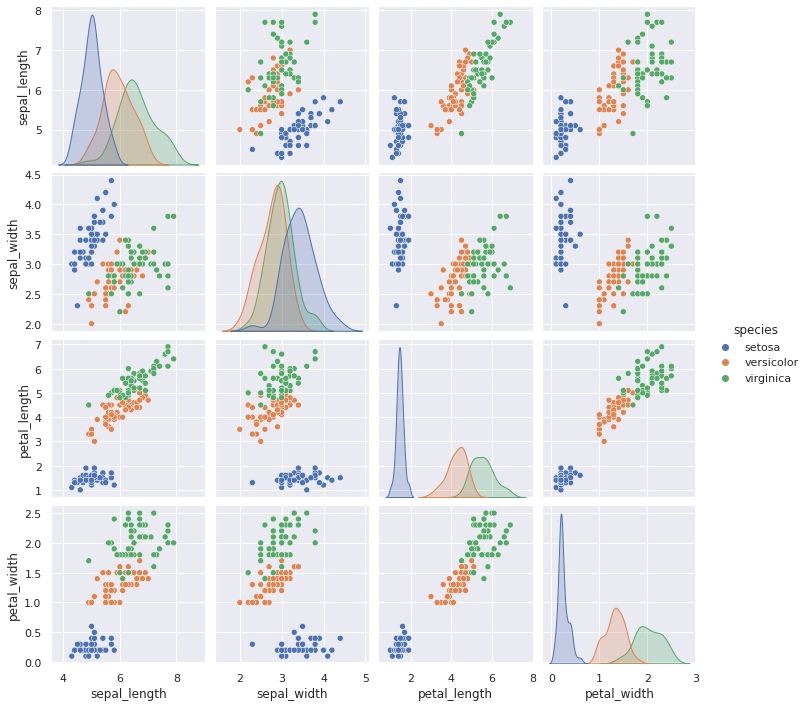

In [17]:
import seaborn as sns
sns.set()
sns.pairplot(iris, hue="species")

The most important conclusion we can draw from these plots is that each pair of variables is roughly linearly related. As a result, we can expect that we should be able to accurately predict petal length from the other three variables using linear regression.

If you just want to do a basic regression and get the coefficients for each variable, you can use `LinearRegression` from the scikit-learn library:

In [18]:
from sklearn.linear_model import LinearRegression

"""
Get all of the irises of the species "setosa" and place them in
a pandas DataFrame called `data`.

Also try with 'setosa' replaced by 'versicolor' and 'virginica'
"""
data = iris[iris['species'] == 'setosa']
    
"""
Split the data into two pieces: the independent variables
(sepal_length, sepal_width, and petal_width), and the dependent
variable (petal_length).
"""
x = data[['sepal_length','sepal_width','petal_width']]
y = data['petal_length']

"""
Create a scikit-learn LinearRegression object which we will
fit to the data.
"""
lm = LinearRegression()
lm.fit(x,y)

for (coef,col) in zip(lm.coef_, x.columns):
    print("%-30s %+.3f" % ("Coefficient for " + col + ":", coef))

Coefficient for sepal_length:  +0.116
Coefficient for sepal_width:   -0.029
Coefficient for petal_width:   +0.463


However, when we run a linear regression we also want to find out other things about our linear model. For instance, we might want to get a confidence interval for each coefficient in the model. The [StatsModels library](https://www.statsmodels.org/stable/index.html) gives us this functionality with `statsmodel.api.sm`:

In [19]:
import statsmodels.api as sm

# Also try with 'setosa' replaced by 'versicolor' and 'virginica'
data = iris[iris['species'] == 'setosa']

x = data[['sepal_length','sepal_width','petal_width']]
y = data['petal_length']
    
"""
Add y-intercept term to our linear model
"""
x = sm.add_constant(x)
    
"""
Perform linear regression
"""
lm      = sm.OLS(y,x)
results = lm.fit()

"""
Print the results
"""
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2.598
Date:                Mon, 27 Sep 2021   Prob (F-statistic):             0.0636
Time:                        21:37:25   Log-Likelihood:                 21.003
No. Observations:                  50   AIC:                            -34.01
Df Residuals:                      46   BIC:                            -26.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8655      0.343      2.521   

You can also use R-style formulas to specify what variables you want to use to perform linear regression. 

In [20]:
import statsmodels.formula.api as smf

df = iris[iris['species'] == 'setosa']

# Predict petal length from sepal_width, sepal_length, and petal_width
model = smf.ols(formula='petal_length ~ sepal_width + sepal_length + petal_width',
                data=df)
results = model.fit()

print("Results (petal_length ~ sepal_width + sepal_length + petal_width)")
print(results.summary())
print('-' * 80)

# Predict petal length from just sepal_length and petal_width
model = smf.ols(formula='petal_length ~ sepal_length + petal_width',
                data=df)
results = model.fit()

print("Results (petal_length ~ sepal_length + petal_width)")
print(results.summary())

Results (petal_length ~ sepal_width + sepal_length + petal_width)
                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2.598
Date:                Mon, 27 Sep 2021   Prob (F-statistic):             0.0636
Time:                        21:37:25   Log-Likelihood:                 21.003
No. Observations:                  50   AIC:                            -34.01
Df Residuals:                      46   BIC:                            -26.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

# Try it yourself

Use `sns.load_dataset('penguins')` to load the [palmerpenguins dataset](https://allisonhorst.github.io/palmerpenguins/) into a [pandas](https://pandas.pydata.org) `DataFrame` with the [seaborn library](https://seaborn.pydata.org/).  Use the `.head()` method to display the first 5 rows of the `DataFrame`.

In [21]:
import pandas as pd
import seaborn as sns

penguins = sns.load_dataset('penguins')

# Show the first few entries in this DataFrame
# YOUR CODE HERE

Looking at row 3, we can see that there are `nan` values in the dataset.  These values will cause problems will calculations down the line so you should use the `.dropna()` method to remove them now.

In [22]:
# Removing rows with 'nan' values
# YOUR CODE HERE

Let's get some information about the penguins dataset. Let's try to do the following:

1. Find out how many columns there are in the `DataFrame` object, and what kinds of data are in each column
2. Calculate the average bill length
3. Determine what penguin species are in the dataset
4. Get an overall summary of the dataset

In [23]:
# 1. Column labels, and types of data in each column
# YOUR CODE HERE

In [24]:
# 2. Calculate the average bill length
# YOUR CODE HERE

In [25]:
# 3. Determine which penguin species are in the dataset
# YOUR CODE HERE

In [26]:
# 4. Summary of the data
# YOUR CODE HERE

Store a `DataFrame` for each species in its own variable using either the `.query()` function or by indexing into the `DataFrame`.  Use the `IPython.display` module to render the first five lines of each `DataFrame`. 

In [27]:
from IPython.display import display

# Method 1: "query" function
# YOUR CODE HERE

# Method 2: index into the DataFrame
# YOUR CODE HERE

# Show the first few entries of the DataFrame corresponding to each species
# YOUR CODE HERE

Use either the `.iloc[:,column_index]` method or index into the dataframe using `column_name` to extract the following columns into their own `DataFrame`:
1. First Column
2. First Through Third Columns
3. `Sex` Column
4. Every Column Except The `Sex` Column 

In [28]:
# Get the first column
# YOUR CODE HERE

# Get the first through third columns
# YOUR CODE HERE

# Get the 'sex' column
# YOUR CODE HERE

# Get all columns *except* the 'sex' column
# YOUR CODE HERE

Use `sns.pairplot()` function to see how the variables in the `DataFrame` are related to each other. Pass `hue="species"` as an argument to function in order to distinguish between the penguin species.

In [29]:
import seaborn as sns
sns.set()
# YOUR CODE HERE

Use the `LinearRegression` object from the `sklearn.linear_model` library to predict flipper length based on bill length, bill depth, and body mass for Adelie penguins.  Print the coefficients for each of the dependent variables.

In [30]:
from sklearn.linear_model import LinearRegression

# Get all Adelie penguins and put them in a DataFrame called `data`.
# YOUR CODE HERE

""" 
Split the data into two sets: the independent variables 
(bill_length_mm, bill_depth_mm, body_mass_g), and
the dependent variable (flipper_length_mm)
"""
# YOUR CODE HERE

"""
Create a scikit-learn LinearRegression object which we will
fit to the data.
"""
# YOUR CODE HERE

# Print out the coefficients for each dependent variable
# YOUR CODE HERE

'\nCreate a scikit-learn LinearRegression object which we will\nfit to the data.\n'

Perform the same regression with `statsmodel.api.sm` from the [StatsModels library](https://www.statsmodels.org/stable/index.html) in order to get more information about the model.

In [31]:
import statsmodels.api as sm

# Get all Adelie penguins and put them in a DataFrame called `data`.
# YOUR CODE HERE

""" 
Split the data into two sets: the independent variables 
(bill_length_mm, bill_depth_mm, body_mass_g), and
the dependent variable (flipper_length_mm)
"""
# YOUR CODE HERE

"""
Add y-intercept term to our linear model
"""
# YOUR CODE HERE

"""
Perform linear regression
"""
# YOUR CODE HERE

"""
Print the results
"""
# YOUR CODE HERE

'\nPrint the results\n'

# Solutions

Use `sns.load_dataset('penguins')` to load the [palmerpenguins dataset](https://allisonhorst.github.io/palmerpenguins/) into a [pandas](https://pandas.pydata.org) `DataFrame` with the [seaborn library](https://seaborn.pydata.org/).  Use the `.head()` method to display the first 5 rows of the `DataFrame`.

In [32]:
import pandas as pd
import seaborn as sns

penguins = sns.load_dataset('penguins')

# `penguins` is stored as a pandas DataFrame
print('Type of "penguins":', type(penguins))

# Show the first few entries in this DataFrame
penguins.head()

Type of "penguins": <class 'pandas.core.frame.DataFrame'>


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Looking at row 3, we can see that there are `nan` values in the dataset.  These values will cause problems will calculations down the line so you should use the `.dropna()` method to remove them now.

In [33]:
# Removing rows with 'nan' values
penguins = penguins.dropna()

display(penguins.head())

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Let's get some information about the penguins dataset. Let's try to do the following:

1. Find out how many columns there are in the `DataFrame` object, and what kinds of data are in each column
2. Calculate the average bill length
3. Determine what penguin species are in the dataset
4. Get an overall summary of the dataset

In [34]:
# 1. Column labels, and types of data in each column
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [35]:
# 2. Calculate the average bill length
penguins['bill_length_mm'].mean()

43.99279279279279

In [36]:
# 3. Determine which penguin species are in the dataset
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [37]:
# 4. Summary of the data
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


Store a `DataFrame` for each species in its own variable using either the `.query()` function or by indexing into the `DataFrame`.  Use the `IPython.display` module to render the first five lines of each `DataFrame`. 

In [38]:
from IPython.display import display

# Method 1: "query" function
adelie = penguins.query('species == "Adelie"')
chinstrap = penguins.query('species == "Chinstrap"')

# Method 2: index into the DataFrame
gentoo = penguins[penguins['species'] == 'Gentoo']

# Show the first few entries of the DataFrame corresponding to each species

print('Adelie data:')
display(adelie.head())

print('Chinstrap data:')
display(chinstrap.head())

print('Gentoo data:')
display(gentoo.head())

Adelie data:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Chinstrap data:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,Female
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,Male
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,Male
155,Chinstrap,Dream,45.4,18.7,188.0,3525.0,Female
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,Male


Gentoo data:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,Female
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,Male
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,Female
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,Male
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,Male


Use either the `.iloc[:,column_index]` method or index into the dataframe using `column_name` to extract the following columns into their own `DataFrame`:
1. First Column
2. First Through Third Columns
3. `Sex` Column
4. Every Column Except The `Sex` Column 

In [39]:
# Get the first column
first_column = penguins.iloc[:,0]
first_column = pd.DataFrame(first_column)

print('First column:')
display(first_column.head())

# Get the first through third columns
first_through_third_columns = penguins.iloc[:,0:3]

print('First through third columns:')
display(first_through_third_columns.head())

# Get the 'sex' column
sex = penguins['sex']
sex = pd.DataFrame(sex)

print('Sex column:')
display(sex.head())

# Get all columns *except* the 'sex' column
exclude_sex = penguins.iloc[:, penguins.columns != 'sex']

print('All columns *except* sex:')
display(exclude_sex.head())

First column:


,species
0,Adelie
1,Adelie
2,Adelie
4,Adelie
5,Adelie


First through third columns:


,species,island,bill_length_mm
0,Adelie,Torgersen,39.1
1,Adelie,Torgersen,39.5
2,Adelie,Torgersen,40.3
4,Adelie,Torgersen,36.7
5,Adelie,Torgersen,39.3


Sex column:


,sex
0,Male
1,Female
2,Female
4,Female
5,Male


All columns *except* sex:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0


Use `sns.pairplot()` function to see how the variables in the `DataFrame` are related to each other. Pass `hue="species"` as an argument to function in order to distinguish between the penguin species.

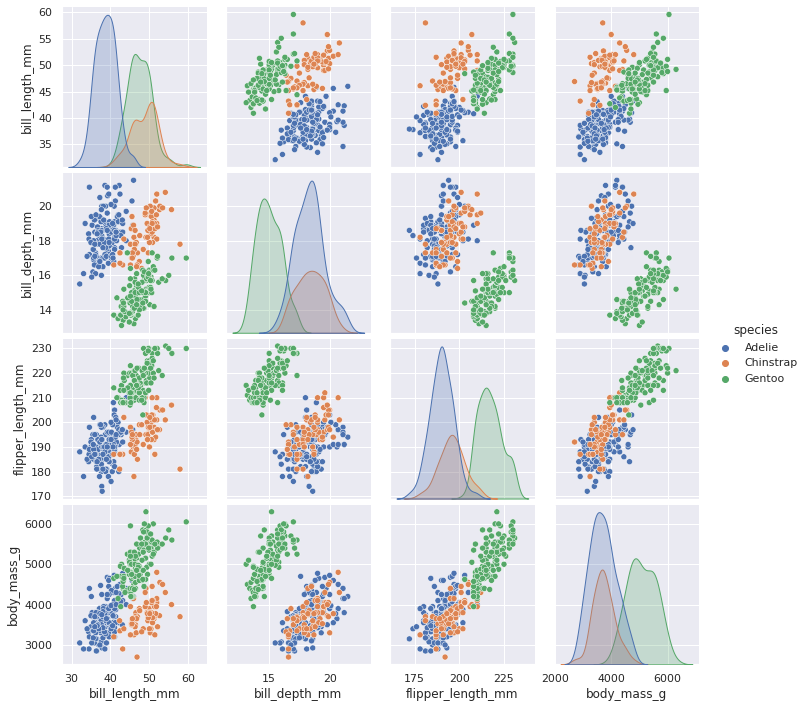

In [40]:
import seaborn as sns
sns.set()
sns.pairplot(penguins, hue="species")

Use the `LinearRegression` object from the `sklearn.linear_model` library to predict flipper length based on bill length, bill depth, and body mass for Adelie penguins.  Print the coefficients for each of the dependent variables.

In [41]:
from sklearn.linear_model import LinearRegression

# Get all Adelie penguins and put them in a DataFrame called `data`.
data = penguins[penguins['species'] == 'Adelie']

""" 
Split the data into two sets: the independent variables 
(bill_length_mm, bill_depth_mm, body_mass_g), and
the dependent variable (flipper_length_mm)
"""
x = data[['bill_length_mm', 'bill_depth_mm', 'body_mass_g']]
y = data['flipper_length_mm']

"""
Create a scikit-learn LinearRegression object which we will
fit to the data.
"""
lm = LinearRegression()
lm.fit(x,y)

# Print out the coefficients for each dependent variable
for (coef,col) in zip(lm.coef_, x.columns):
    print("%-30s %+.3f" % ("Coefficient for " + col + ":", coef))

Coefficient for bill_length_mm: +0.264
Coefficient for bill_depth_mm: +0.271
Coefficient for body_mass_g:   +0.005


Perform the same regression with `statsmodel.api.sm` from the [StatsModels library](https://www.statsmodels.org/stable/index.html) in order to get more information about the model.

In [42]:
import statsmodels.api as sm

# Get all Adelie penguins and put them in a DataFrame called `data`.
data = penguins[penguins["species"] == "Adelie"]

""" 
Split the data into two sets: the independent variables 
(bill_length_mm, bill_depth_mm, body_mass_g), and
the dependent variable (flipper_length_mm)
"""
x = data[["bill_length_mm", "bill_depth_mm", "body_mass_g"]]
y = data["flipper_length_mm"]

"""
Add y-intercept term to our linear model
"""
x = sm.add_constant(x)

"""
Perform linear regression
"""
lm = sm.OLS(y, x)
results = lm.fit()

"""
Print the results
"""
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      flipper_length_mm   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     13.88
Date:                Mon, 27 Sep 2021   Prob (F-statistic):           5.50e-08
Time:                        21:37:30   Log-Likelihood:                -461.67
No. Observations:                 146   AIC:                             931.3
Df Residuals:                     142   BIC:                             943.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            155.0298      8.961     17.

## Additional References <a id="additional-references"></a>

* O'Reilly provides a couple of good books that go in-depth about these tools and more:
  * [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do)
  * [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) -- this book was published in 2012 and may be slightly dated. However, the author provides some Jupyter Notebooks for free in [this repository](https://github.com/wesm/pydata-book) that you may find helpful.
* Check out the full documentation for Jupyter on the [Project Jupyter site](https://jupyter.org/documentation).
* Plotting tools:
  * Matplotlib
    * [Documentation](https://matplotlib.org/contents.html)
    * [Tutorials](https://matplotlib.org/tutorials/index.html)
  * Seaborn
    * [Documentation](https://seaborn.pydata.org/api.html)
    * [Introduction](https://seaborn.pydata.org/introduction.html)
* [Statsmodels documentation](https://www.statsmodels.org/stable/index.html)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=575af5dc-65a8-40d2-9ecb-58d75726c7c0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>